# Problem Statement:
*   The system in foucs is the Air Pressure System(APS) which generates pressurized air that are utilised in various functions in a truck, such as braking and gear changes. The datasets positive class corresponds to component failures for a specific component of the APS system. The negative class corresponds to trucks with failures for components not related to the APS system.
*   The problem is to reduce the cost due to unnecesary repairs. So it is required to minimize the false predictions.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv', na_values="na")
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0
1,pos,453236,NaN,2.926000e+03,NaN,0.0,0.0,0.0,0.0,222.0,...,7908038.0,3026002.0,5025350.0,2025766.0,1160638.0,533834.0,493800.0,6914.0,0.0,0.0
2,pos,72504,NaN,1.594000e+03,1052.0,0.0,0.0,0.0,244.0,178226.0,...,1432098.0,372252.0,527514.0,358274.0,332818.0,284178.0,3742.0,0.0,0.0,0.0
3,pos,762958,NaN,NaN,NaN,NaN,NaN,776.0,281128.0,2186308.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pos,695994,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1397742.0,495544.0,361646.0,28610.0,5130.0,212.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36183,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
36184,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
36185,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
36186,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


## In this particular dataset, this class is a target variable, positive indicates that the error happened is due to APS. The neg indicates that he error that happened is not because of APS.

In [13]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,3.618800e+04,8292.000000,3.404700e+04,2.698800e+04,34601.000000,34601.000000,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,...,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,3.580900e+04,34458.000000,34459.000000
mean,6.591016e+04,0.711770,3.535223e+08,3.185447e+05,7.234300,11.606543,1.952347e+02,1.508277e+03,1.250718e+04,1.156928e+05,...,4.853621e+05,2.293208e+05,4.837846e+05,4.401019e+05,3.686943e+05,3.718051e+05,1.485117e+05,8.897664e+03,0.083464,0.209234
std,1.641238e+05,3.054033,7.926486e+08,5.225398e+07,186.437282,234.405353,1.852862e+04,4.371360e+04,1.801543e+05,8.853380e+05,...,1.254188e+06,5.948054e+05,1.251106e+06,1.331837e+06,1.220688e+06,1.722483e+06,5.153265e+05,5.316375e+04,3.789020,8.613915
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.660000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.986000e+03,1.190000e+03,2.732000e+03,3.680000e+03,5.660000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.102600e+04,0.000000,1.520000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.378500e+05,1.137840e+05,2.263560e+05,1.952480e+05,9.559400e+04,4.296600e+04,4.278000e+03,0.000000e+00,0.000000,0.000000
75%,5.006850e+04,0.000000,9.640000e+02,4.320000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.470120e+05,2.222860e+05,4.748680e+05,4.103280e+05,2.791920e+05,1.706080e+05,1.432300e+05,2.018000e+03,0.000000,0.000000
max,2.746564e+06,100.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,2.904730e+07,...,3.123272e+07,1.676929e+07,2.747758e+07,5.743524e+07,3.160781e+07,3.727856e+07,1.926740e+07,3.810078e+06,362.000000,1146.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 47.2+ MB


In [15]:
df.isnull().sum()

,0
class,0
aa_000,0
ab_000,27896
ac_000,2141
ad_000,9200
...,...
ee_007,379
ee_008,379
ee_009,379
ef_000,1730


In [16]:
# to check number of columns and rows

df.shape

(36188, 171)

In [17]:
# Check how many unique values are present in the class

df['class'].value_counts()

,count
class,
neg,35188
pos,1000


### Above results shows that it is imbalanced data, need to check any other problem.

In [19]:
# define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"we have {len(numeric_features)} numrical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 170 numrical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

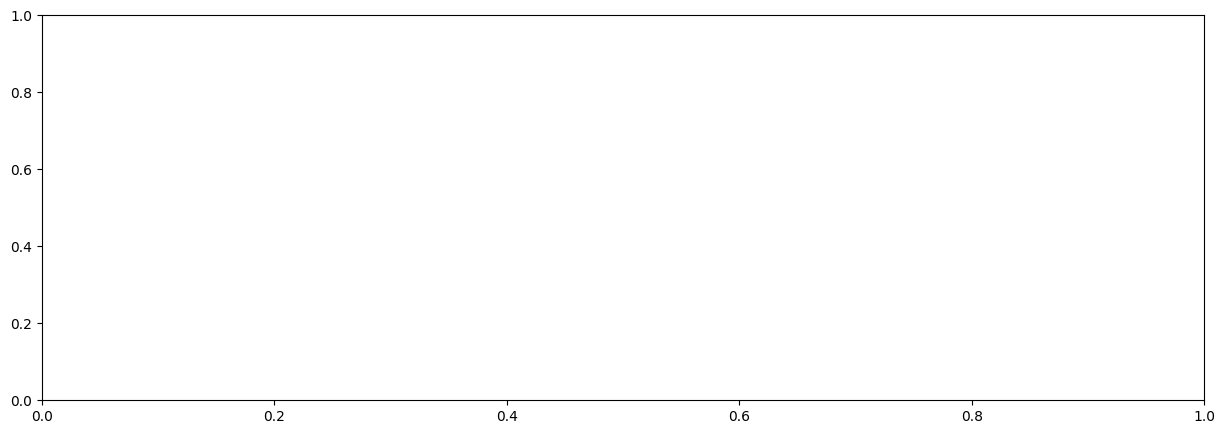

In [21]:
# check the missing values

fig, ax = plt.subplots(figsize=(15,5))
missing = df.isna().sum()

In [23]:
df.isna().sum().div(df.shape[0]).mul(100)

,0
class,0.000000
aa_000,0.000000
ab_000,77.086327
ac_000,5.916326
ad_000,25.422792
...,...
ee_007,1.047309
ee_008,1.047309
ee_009,1.047309
ef_000,4.780590


In [24]:
df.isna().sum().mean()*100

301556.7251461988

In [26]:
df.isna().mean()

,0
class,0.000000
aa_000,0.000000
ab_000,0.770863
ac_000,0.059163
ad_000,0.254228
...,...
ee_007,0.010473
ee_008,0.010473
ee_009,0.010473
ef_000,0.047806


In [2]:
from sklearn.linear_model import LogisticRegression